In [62]:
import pandas as pd
import numpy as np
credit=pd.read_csv("C:\\Users\\DELL\\Desktop\\客户信用风险\\credit_customers.csv")
# Check the summary of the data frame
print(credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [63]:
# 使用select_dtypes获取一个只包含字符串列的新数据集
credit_string = credit.select_dtypes(include=['object'])

In [64]:
# 统计每个类别变量的比例
for var in credit_string.columns:
    # 使用value_counts函数计算每个类别的频数
    frequency = credit_string[var].value_counts()
    
    # 计算总的观测数量
    total_count = frequency.sum()
    
    # 计算每个类别的比例
    proportions = frequency / total_count
    
    # 打印结果
    print("Variable:", var)
    print(proportions)
    print("----------------------------------------")


Variable: checking_status
no checking   0.3940
<0            0.2740
0<=X<200      0.2690
>=200         0.0630
Name: checking_status, dtype: float64
----------------------------------------
Variable: credit_history
existing paid                    0.5300
critical/other existing credit   0.2930
delayed previously               0.0880
all paid                         0.0490
no credits/all paid              0.0400
Name: credit_history, dtype: float64
----------------------------------------
Variable: purpose
radio/tv              0.2800
new car               0.2340
furniture/equipment   0.1810
used car              0.1030
business              0.0970
education             0.0500
repairs               0.0220
domestic appliance    0.0120
other                 0.0120
retraining            0.0090
Name: purpose, dtype: float64
----------------------------------------
Variable: savings_status
<100               0.6030
no known savings   0.1830
100<=X<500         0.1030
500<=X<1000        0.0630


In [65]:
# 对一些无法猜测如何影响信用的分类变量进行独热编码
data=pd.get_dummies(credit,columns=['purpose', 'personal_status',"other_parties","property_magnitude"])
# 但是为了避免维数灾难，不能对所有变量进行独热编码，因此对另外一些可能存在顺序的分类变量进行自定义编码
cols = ['checking_status','credit_history', 'savings_status', 'employment', 'other_payment_plans','housing', 
        'job','own_telephone','foreign_worker','class']
# 映射字典
col_dicts = {}
col_dicts = {
  'checking_status': {
    'no checking': 0,
    '<0': 1,
    '0<=X<200': 2,
    '>=200': 3
  },
             
  'credit_history': {
      'existing paid': 0,
      'critical/other existing credit': 1,
      'delayed previously': 2,
      'all paid': 3,
      'no credits/all paid': 4
  },

'savings_status': {
      'no known savings': 0,
      '<100': 1,
      '100<=X<500': 2,
      '500<=X<1000': 3,
      '>=1000': 4
  },

 'employment': {
  'unemployed': 0,
  '<1': 1,
  '1<=X<4': 2,
  '4<=X<7': 3,
  '>=7': 4
  },

'other_payment_plans':{
    'none':0,
    'bank':1,
    'stores':2
},
      
 'housing': {'for free': 0, 'rent': 1, 'own': 2},

 'job': {
  'unemp/unskilled non res': 0,
  'unskilled resident': 1,
  'skilled': 2,
  'high qualif/self emp/mgmt': 3
  },

  'own_telephone': {'none': 0, 'yes': 1},

  'foreign_worker': {'no': 1, 'yes': 0},

  'class': {'bad': 0, 'good': 1}
 }


for col in cols:
    data[col] = credit[col].map(lambda x: x.strip())
    data[col] = credit[col].map(col_dicts[col])

# 打印编码后的数据集
print(data)

     checking_status  duration  credit_history  credit_amount  savings_status  \
0                  1    6.0000               1      1169.0000               0   
1                  2   48.0000               0      5951.0000               1   
2                  0   12.0000               1      2096.0000               1   
3                  1   42.0000               0      7882.0000               1   
4                  1   24.0000               2      4870.0000               1   
..               ...       ...             ...            ...             ...   
995                0   12.0000               0      1736.0000               1   
996                1   30.0000               0      3857.0000               1   
997                0   12.0000               0       804.0000               1   
998                1   45.0000               0      1845.0000               1   
999                2   45.0000               1      4576.0000               2   

     employment  installmen

In [66]:
# 检查一下变量类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   checking_status                       1000 non-null   int64  
 1   duration                              1000 non-null   float64
 2   credit_history                        1000 non-null   int64  
 3   credit_amount                         1000 non-null   float64
 4   savings_status                        1000 non-null   int64  
 5   employment                            1000 non-null   int64  
 6   installment_commitment                1000 non-null   float64
 7   residence_since                       1000 non-null   float64
 8   age                                   1000 non-null   float64
 9   other_payment_plans                   1000 non-null   int64  
 10  housing                               1000 non-null   int64  
 11  existing_credits  

In [67]:

import matplotlib.pyplot as plt
import seaborn as sns

       checking_status  duration  credit_history  credit_amount  \
count        1000.0000 1000.0000       1000.0000      1000.0000   
mean            1.0010   20.9030          0.7760      3271.2580   
std             0.9570   12.0588          1.0606      2822.7369   
min             0.0000    4.0000          0.0000       250.0000   
25%             0.0000   12.0000          0.0000      1365.5000   
50%             1.0000   18.0000          0.0000      2319.5000   
75%             2.0000   24.0000          1.0000      3972.2500   
max             3.0000   72.0000          4.0000     18424.0000   

       savings_status  employment  installment_commitment  residence_since  \
count       1000.0000   1000.0000               1000.0000        1000.0000   
mean           1.1900      2.3840                  2.9730           2.8450   
std            0.9669      1.2083                  1.1187           1.1037   
min            0.0000      0.0000                  1.0000           1.0000   
25%   

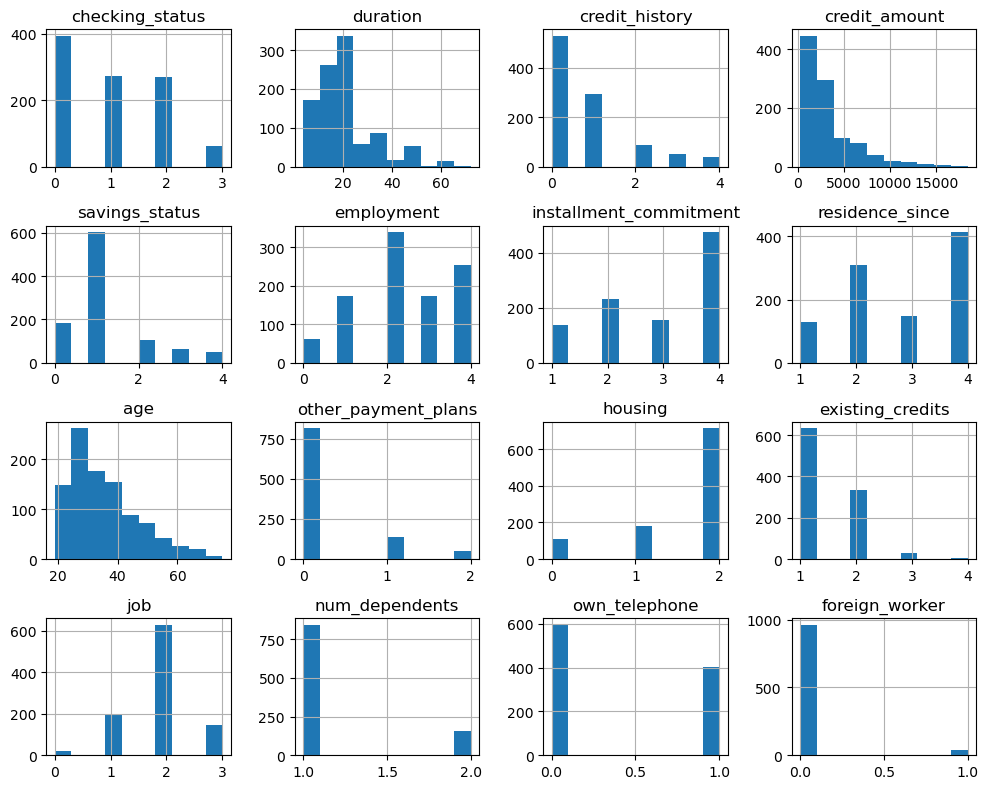

In [68]:
import warnings
warnings.filterwarnings('ignore')

# 描述性统计分析
statistics = data.describe()
print(statistics)

# 构建可视化图表
# 直方图

# 选择前几列变量，剔除独热编码的变量
plot_vars = data.columns[:16]

# 构建直方图
data[plot_vars].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()



                        duration  credit_amount  installment_commitment  \
duration                  1.0000         0.6250                  0.0747   
credit_amount             0.6250         1.0000                 -0.2713   
installment_commitment    0.0747        -0.2713                  1.0000   
residence_since           0.0341         0.0289                  0.0493   
age                      -0.0361         0.0327                  0.0583   
existing_credits         -0.0113         0.0208                  0.0217   
num_dependents           -0.0238         0.0171                 -0.0712   
class                    -0.2149        -0.1547                 -0.0724   

                        residence_since     age  existing_credits  \
duration                         0.0341 -0.0361           -0.0113   
credit_amount                    0.0289  0.0327            0.0208   
installment_commitment           0.0493  0.0583            0.0217   
residence_since                  1.0000  0.2664 

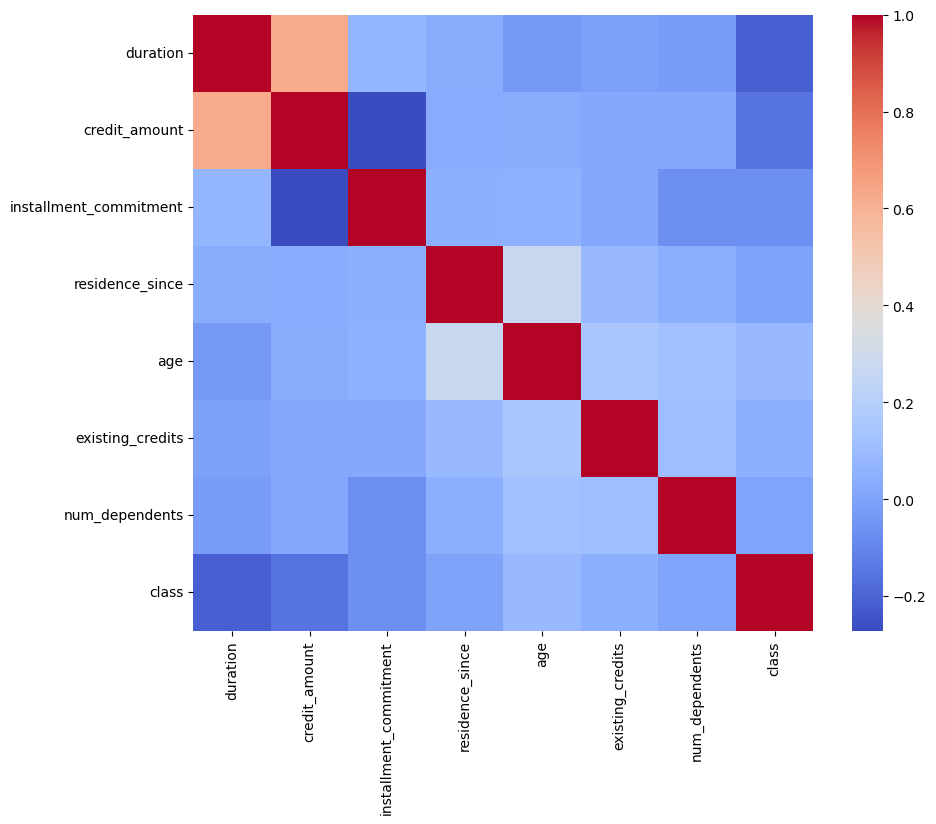

In [69]:

# 计算数值型变量与分类目标变量之间的相关系数（皮尔逊相关系数）
numeric_vars = ['duration', 'credit_amount', 'installment_commitment','residence_since','age','existing_credits','num_dependents']  # 数值型变量

correlation_matrix = data[numeric_vars + ["class"]].corr()

# 相关系数矩阵
print(correlation_matrix)
# 热力图
correlation_matrix = data[numeric_vars + ["class"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=None, cmap='coolwarm')
plt.show()


可以看到数值型特征之间不存在多重共线性，但是与目标变量之间的相关系数都较低，这可能是因为目标变量是分类变量，还需进一步分析。

In [70]:
from sklearn.feature_selection import mutual_info_classif
# 计算特征和目标的互信息
# 互信息（Mutual Information）：互信息是一种非线性相关性度量，用于衡量两个变量之间的信息共享程度。它可以用于衡量数值型变量和二分类变量之间的关联程度。
mutual_info = mutual_info_classif(data[numeric_vars], data["class"])
print("\nMutual Information:")
for i, info in enumerate(mutual_info):
    print(f"{data[numeric_vars].columns[i]}: {info}")



Mutual Information:
duration: 0.019555479276058385
credit_amount: 0.015067082531508014
installment_commitment: 0.013312286698859088
residence_since: 0.02753545032039617
age: 0.002207968734748267
existing_credits: 0.0
num_dependents: 0.022988906226724115


互信息的绝对值本身没有一个特定的标准观察值,比较上述数值型特征变量与目标分类变量之间互信息的值，可以看出，installment_commitment，credit_amount，duration三个变量可能对于分类目标比较重要。

接下俩观察类别型特征变量与分类目标变量之间的关系。

Cross-tabulation for checking_status:
class              0    1
checking_status          
0                 46  348
1                135  139
2                105  164
3                 14   49

Cross-tabulation for credit_history:
class             0    1
credit_history          
0               169  361
1                50  243
2                28   60
3                28   21
4                25   15

Cross-tabulation for savings_status:
class             0    1
savings_status          
0                32  151
1               217  386
2                34   69
3                11   52
4                 6   42

Cross-tabulation for employment:
class         0    1
employment          
0            23   39
1            70  102
2           104  235
3            39  135
4            64  189

Cross-tabulation for other_payment_plans:
class                  0    1
other_payment_plans          
0                    224  590
1                     57   82
2                     19   28

Cross

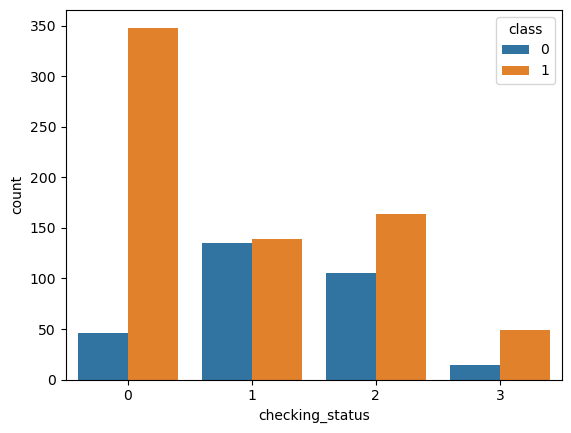

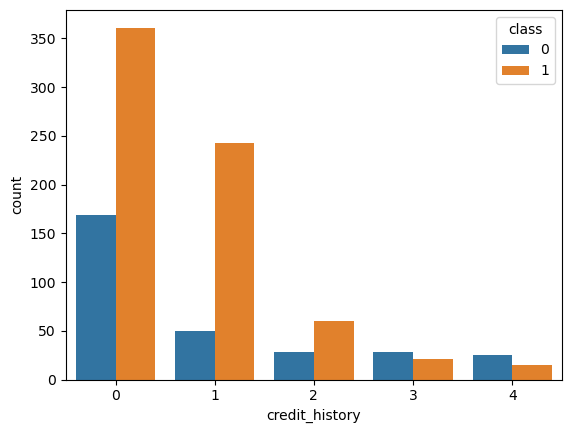

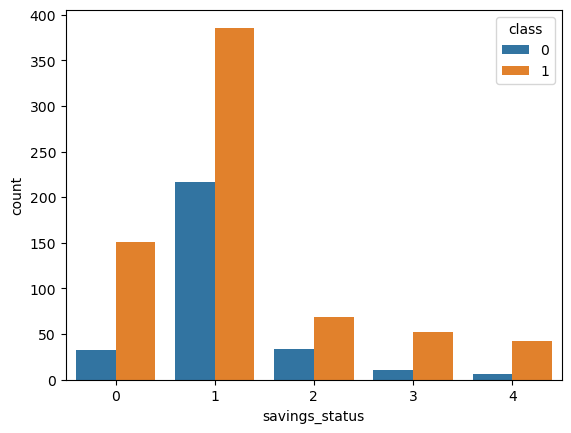

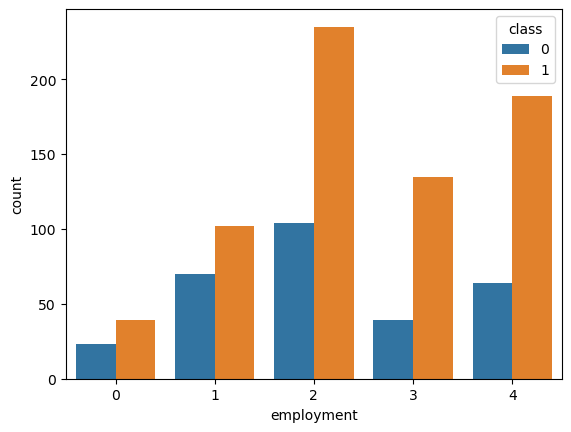

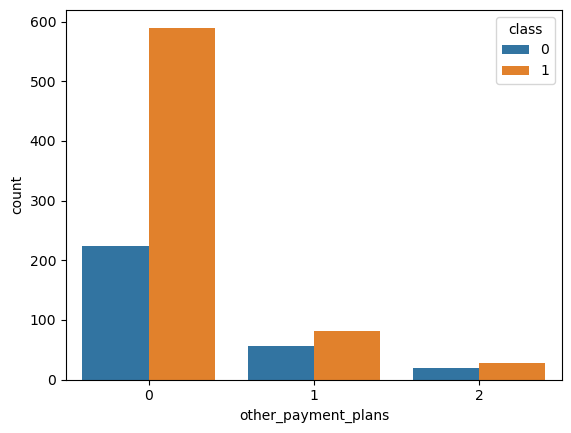

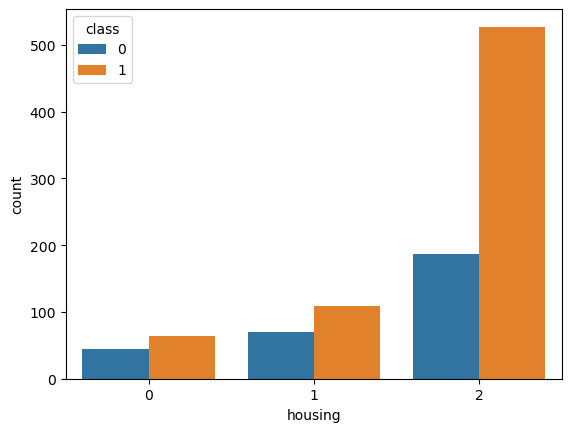

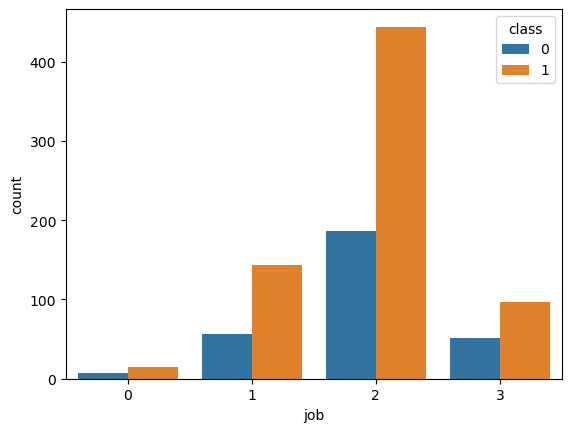

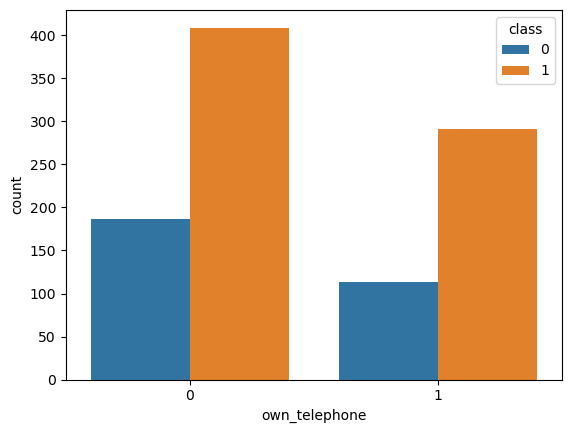

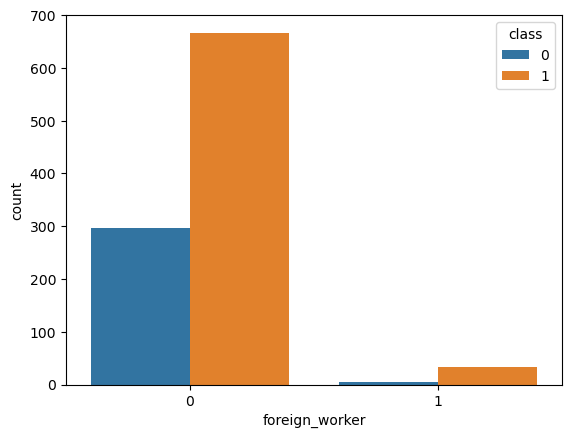

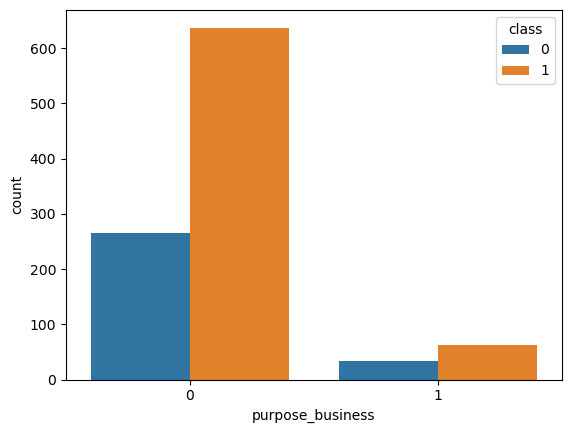

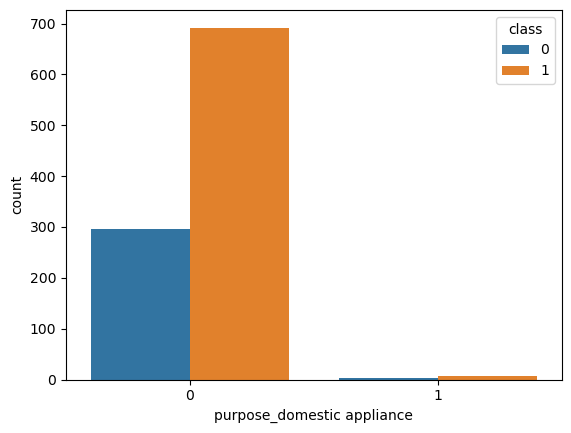

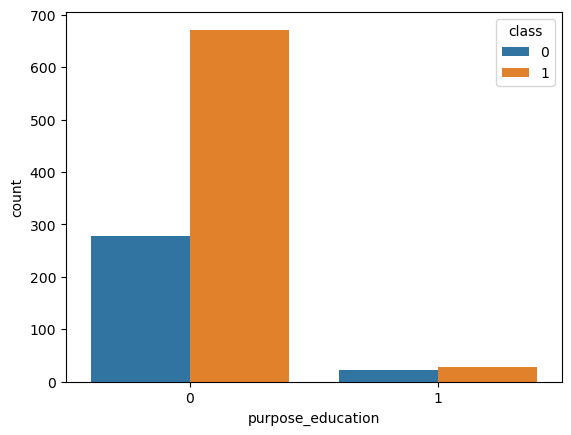

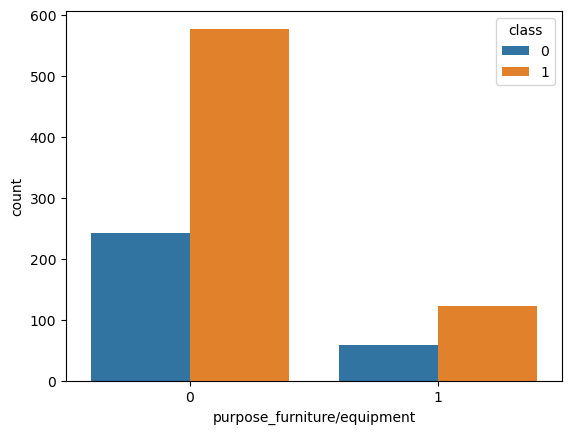

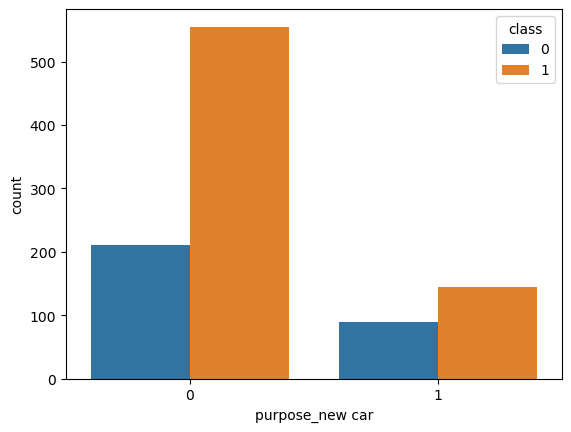

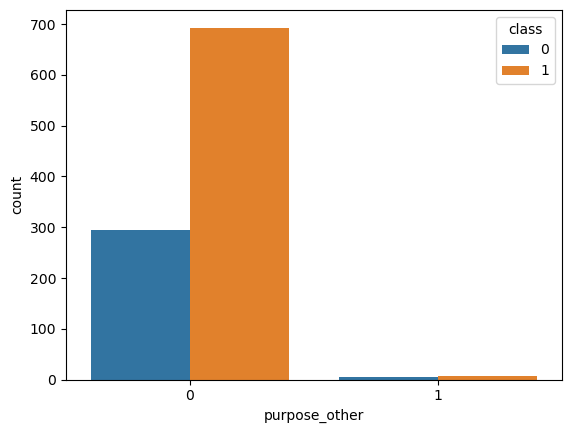

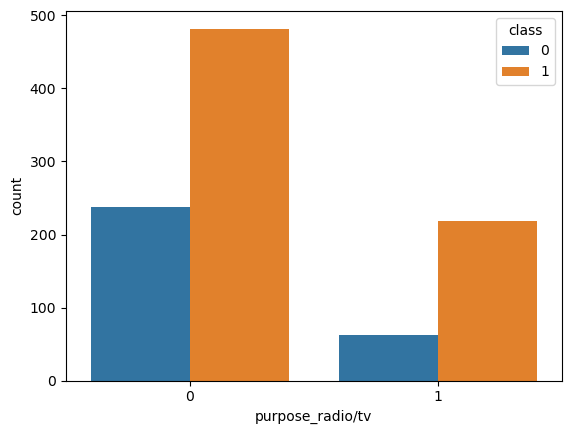

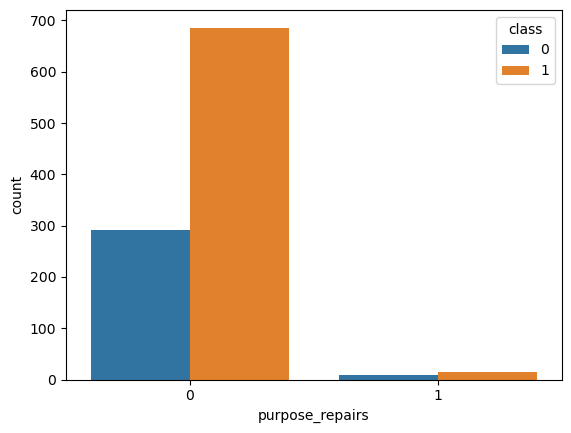

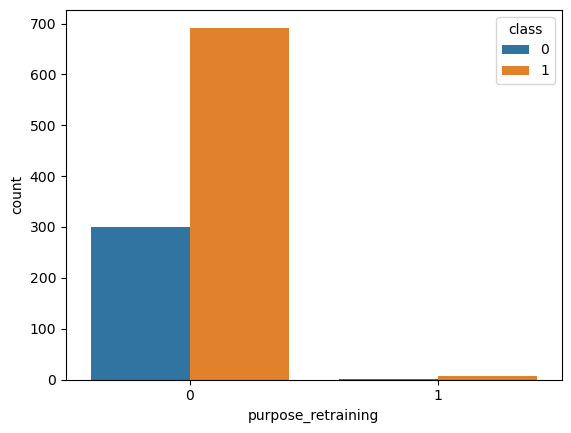

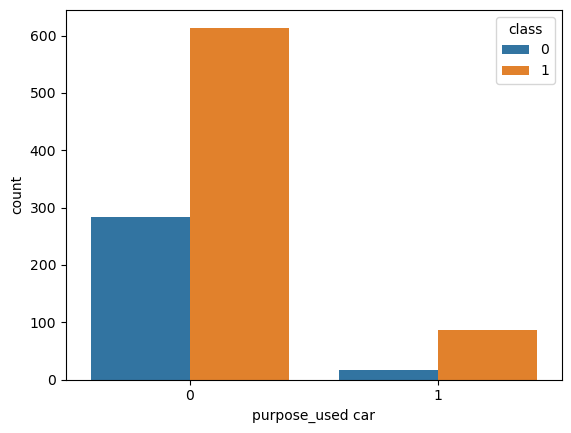

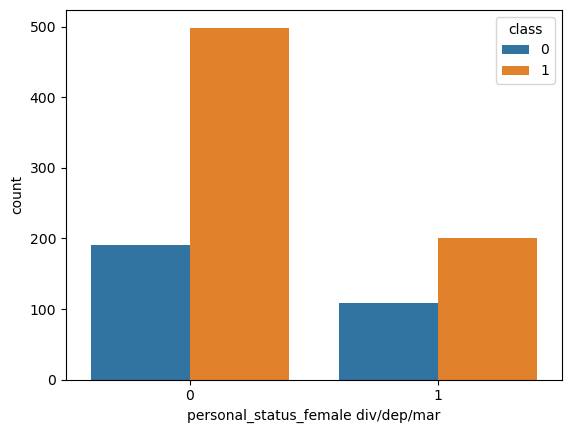

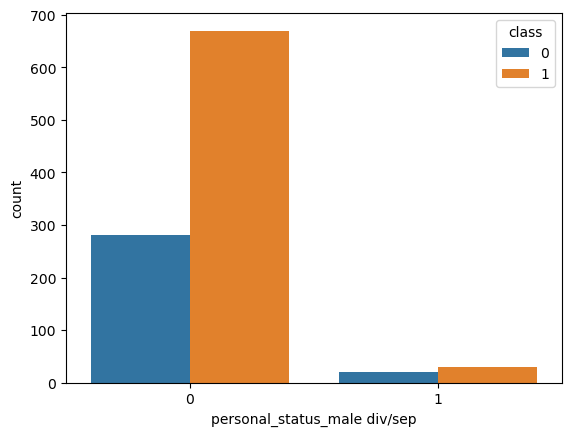

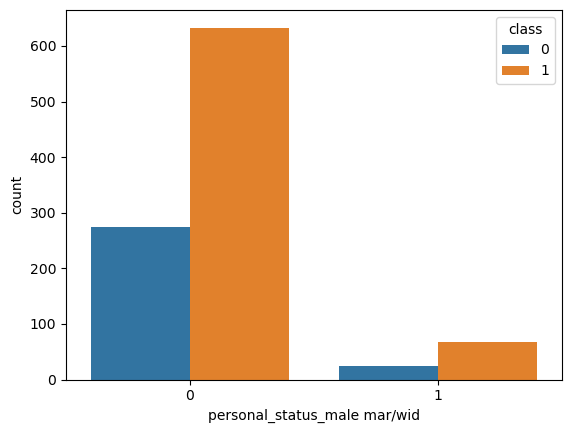

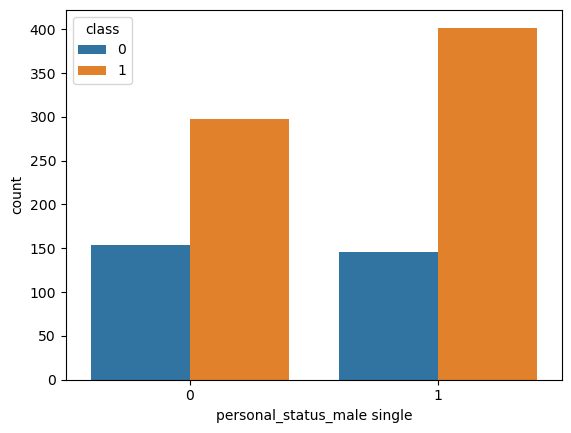

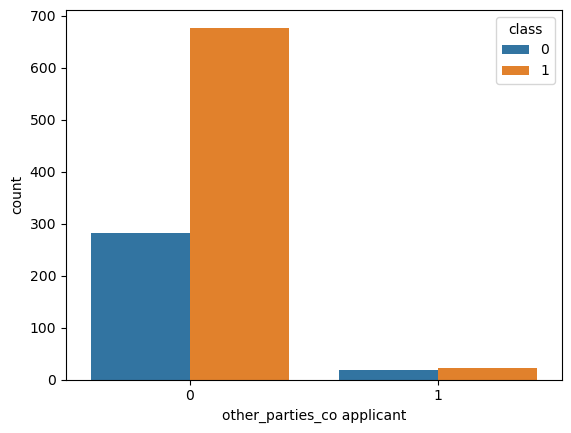

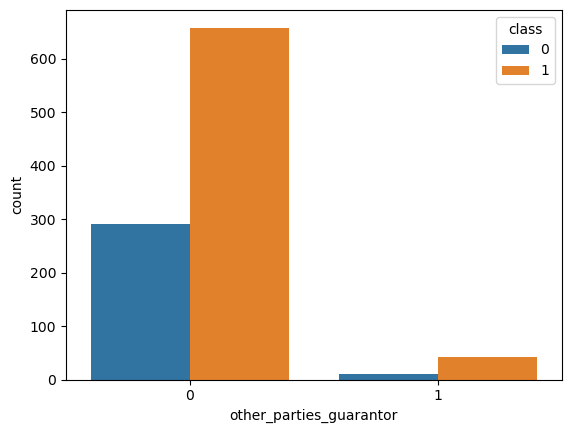

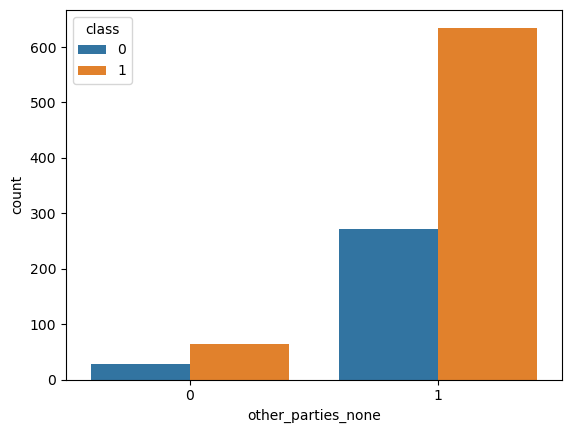

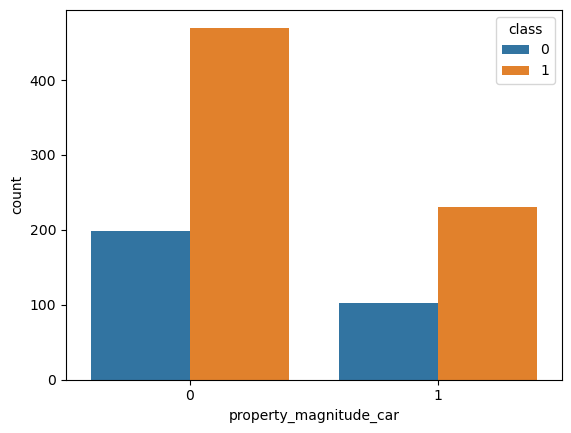

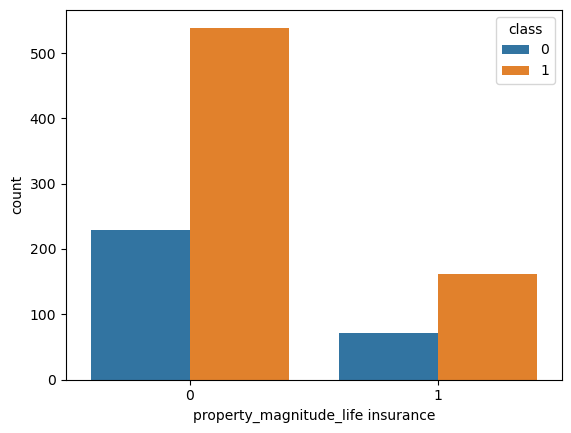

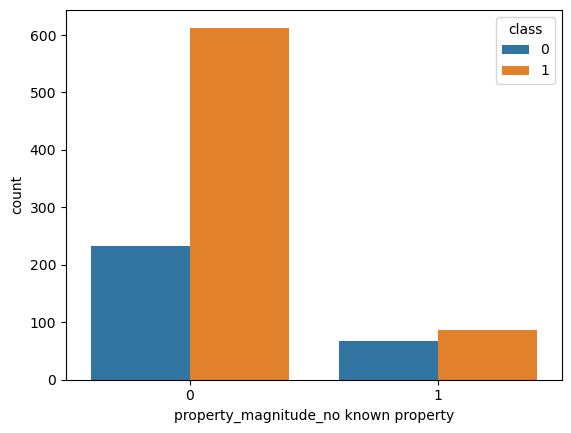

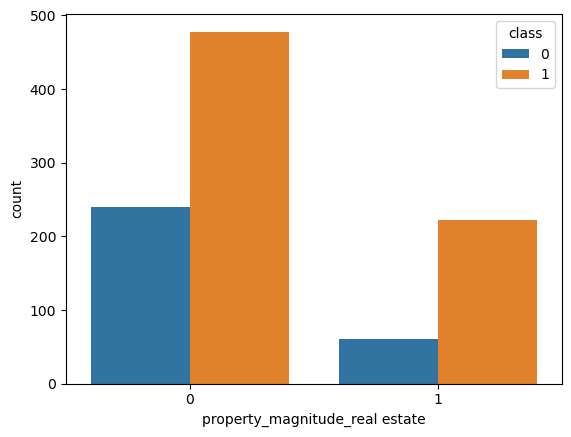

In [71]:
# 计算分类变量与分类目标变量之间的关联度（使用交叉表）

# 选择除了数值型变量和名为"class"的变量之外的所有列作为分类变量
categorical_vars = data.select_dtypes(exclude=['float64']).drop('class', axis=1).columns

# 计算分类变量与分类目标变量之间的关联度（使用交叉表）
for var in categorical_vars:
    cross_tab = pd.crosstab(data[var], data["class"])
    print(f"Cross-tabulation for {var}:\n{cross_tab}\n")



# 使用柱状图可视化分类变量与分类目标变量之间的关系
for var in categorical_vars:
    sns.countplot(x=var, hue="class", data=data)
    plt.show()


观察上述可视化图表，并未发现类别变量与目标变量之间明显的相关性，进一步进行统计分析：

                                Variable  p-value
0                        checking_status   0.0000
1                         credit_history   0.0000
28  property_magnitude_no known property   0.0003
4                    other_payment_plans   0.0003
29        property_magnitude_real estate   0.0014
18                      purpose_used car   0.0028
3                             employment   0.0041
15                      purpose_radio/tv   0.0041
13                       purpose_new car   0.0073
8                         foreign_worker   0.0109
11                     purpose_education   0.0308
5                                housing   0.0314
19    personal_status_female div/dep/mar   0.0474
23            other_parties_co applicant   0.0521
22           personal_status_male single   0.0863
24               other_parties_guarantor   0.0901
20          personal_status_male div/sep   0.1228
17                    purpose_retraining   0.2162
9                       purpose_business   0.2776


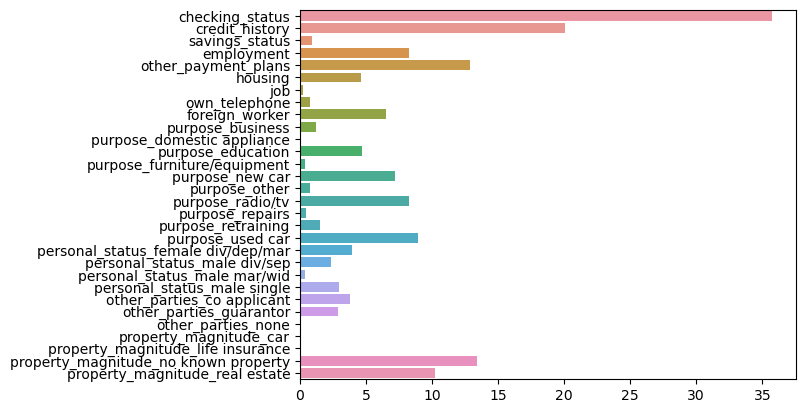

In [72]:
# 使用卡方统计量来评估特征集中分类变量对目标分类变量的重要性。
from sklearn.feature_selection import chi2
import scipy.stats as stats

X = data[categorical_vars]
y = data["class"]
# 计算卡方统计量和p值
chi2_scores, p_values = chi2(X, y)

# 可视化卡方统计量
sns.barplot(x=chi2_scores, y=categorical_vars)

# 创建包含变量和p值的DataFrame
p_values_df = pd.DataFrame({'Variable': categorical_vars, 'p-value': p_values})

# 按照p值从小到大排序
p_values_df = p_values_df.sort_values(by='p-value')
# 设置 p 值的显示格式为小数形式
pd.options.display.float_format = '{:.4f}'.format
# 打印排序后的表格
print(p_values_df)

观察上述统计分析结果，checking_status，credit_history，property_magnitude_no known property，other_payment_plans，property_magnitude_real estate，purpose_used car，employment,purpose_radio/tv，purpose_new car，foreign_worker几个类别型特征变量与目标变量之间具有比较显著的相关性。可能对分类目标比较重要。

In [73]:
from sklearn.model_selection import train_test_split
y = data["class"]
feature_vars = data.drop('class', axis=1).columns
X = data[feature_vars]
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 查看训练集和测试集的形状
print("训练集样本数:", X_train.shape[0])
print("测试集样本数:", X_test.shape[0])


训练集样本数: 700
测试集样本数: 300


In [74]:

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



SVC() : 0.7133333333333334
DecisionTreeClassifier() : 0.6833333333333333
ExtraTreeClassifier() : 0.65
LogisticRegression() : 0.7133333333333334
GaussianNB() : 0.7133333333333334
KNeighborsClassifier() : 0.6566666666666666
MLPClassifier() : 0.5333333333333333
RandomForestClassifier() : 0.7533333333333333
AdaBoostClassifier() : 0.7166666666666667
GradientBoostingClassifier() : 0.76


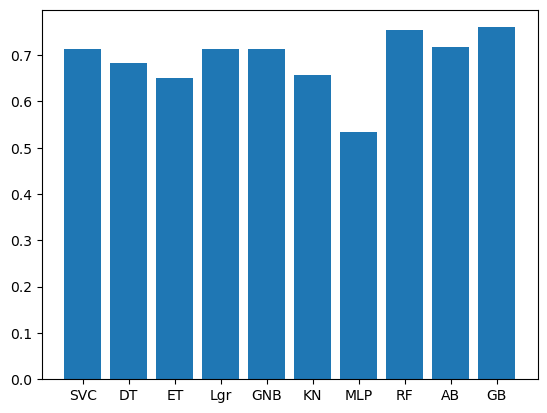

In [75]:


# 创建算法列表
models = [SVC(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

# 训练每个算法模型并进行预测
accuracies = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(model,":",accuracy)
    accuracies.append(accuracy)
    

# 绘制准确率直方图

plt.bar(range(len(models)), accuracies)
plt.xticks(range(len(models)), ['SVC','DT','ET','Lgr','GNB','KN','MLP','RF','AB','GB'])

plt.show()


观察上面的直方图，可以看出RandomForestClassifier在测试集上有最高的准确率，达到0.78，对该算法进一步研究：

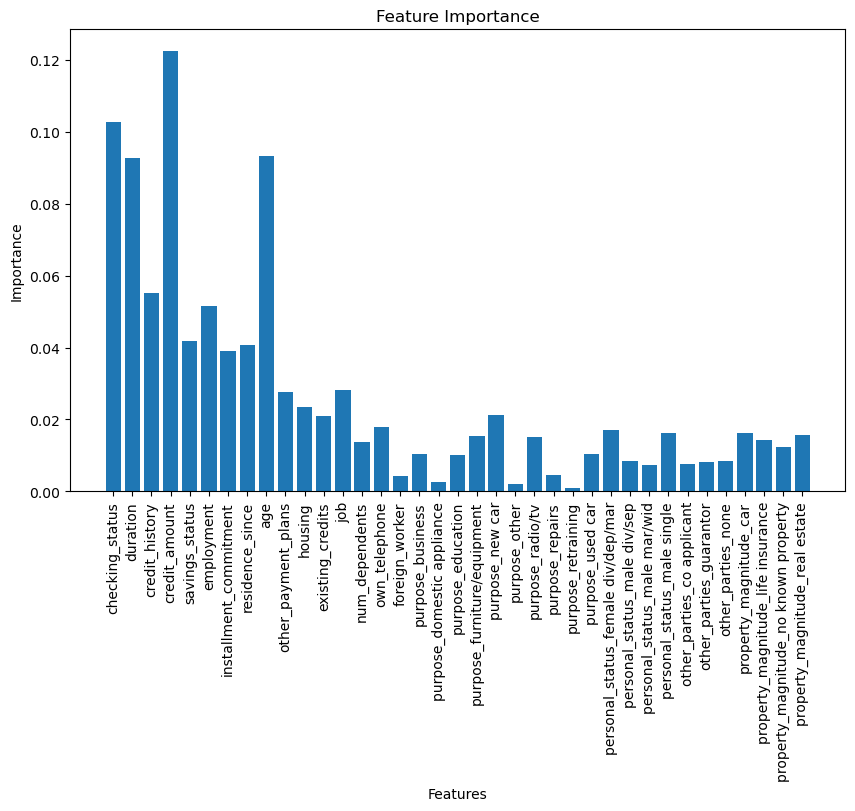

In [76]:
RF=RandomForestClassifier()
RF.fit(X, y)
importance = RF.feature_importances_
# 获取数据集中的特征名称
feature_names = data.drop('class', axis=1).columns

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [77]:
# 对特征重要性进行排序并获取前十个最重要的特征索引
top_indices = np.argsort(importance)[::-1][:10]

# 输出前十个最重要的变量名
top_features = feature_names[top_indices]
print("Top 10 features:")
for feature in top_features:
    print(feature)

Top 10 features:
credit_amount
checking_status
age
duration
credit_history
employment
savings_status
residence_since
installment_commitment
job
